In [ ]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 11.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
import torchvision as tv
import os
import SimpleITK as sitk

download = True # Set to True only during the first run or after reseting the notebook, then set to False
train = False # Let's use the testing dataset
root = '/content/MNIST' # Let's download the dataset to the /content folder
transform = tv.transforms.ToTensor() # Used to convert the PIL image to PyTorch Tensor
mnist_dataset = tv.datasets.MNIST(root=root, train=train, transform=transform, download=download)

print(f"Testing MNIST dataset length: {len(mnist_dataset)}")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/MNIST/raw

Testing MNIST dataset length: 10000


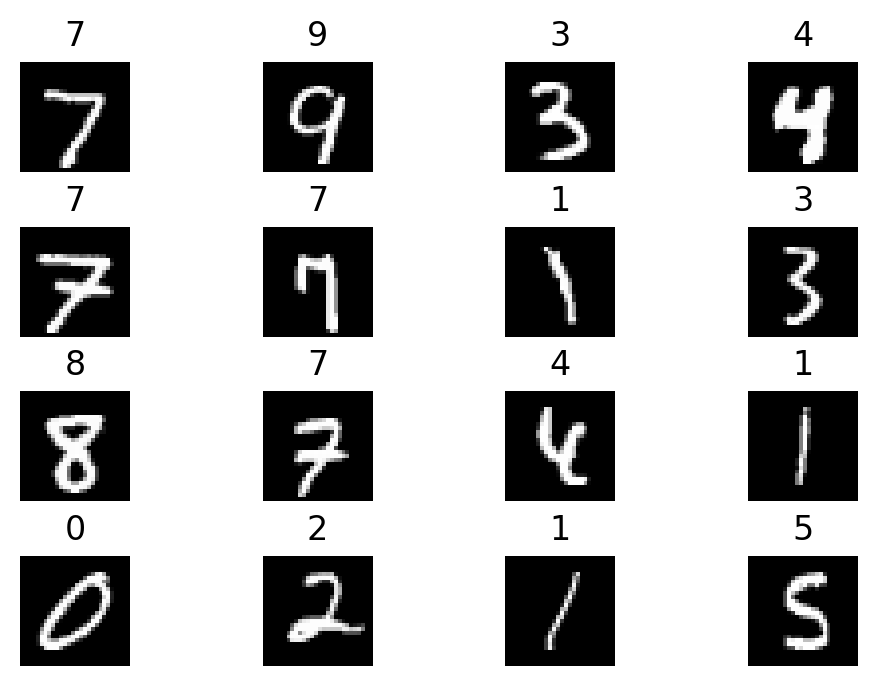

In [ ]:
batch_size = 16 # The number of cases to be loaded at once
shuffle = False # Whether to load the dataset in random order
num_workers = 2 # The number of CPU cores used by the DataLoader

mnist_dataloader = tc.utils.data.DataLoader(mnist_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

plt.figure(dpi=200)
i = 1
for images, classes in mnist_dataloader:
    plt.subplot(4, 4, i)
    plt.imshow(images[0, 0, :, :], cmap='gray')
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')
    plt.title(classes[0].item())
    i += 1

    if i > 4*4:
      break

plt.show()

In [ ]:
input_file = "/content/gdrive/MyDrive/Brain_MRI.zip" # Path to the "Brain_MRI.zip"
output_folder = "/content/gdrive/MyDrive/Brain_MRI" # Path to the folder where you would like to unzip the input ".zip" file

print(f"Input file path: {input_file}")
print(f"Output folder path: {output_folder}")

#!unzip {input_file} -d {output_folder}

Input file path: /content/gdrive/MyDrive/Brain_MRI.zip
Output folder path: /content/gdrive/MyDrive/Brain_MRI


In [ ]:
class BrainMRIDataset(tc.utils.data.Dataset):
    def __init__(self, dataset_path : str, mode : str="training"):
        self.dataset_path = dataset_path
        self.mode = mode # "training" or "testing"

        if self.mode == "training":
            self.data_path = os.path.join(self.dataset_path, "Training")
        elif self.mode == "testing":
            self.data_path = os.path.join(self.dataset_path, "Testing")
        else:
            raise ValueError("Unsupported mode.")
        self.classes = os.listdir(self.data_path) # Assumption that the classes are represented by the folder names
        print(f"Available classes: {self.classes}")
        self.classes_dict = {self.classes[i]: i for i in range(len(self.classes))}
        print(f"Classes dict: {self.classes_dict}") # Mapping from the classes to numbers

        # Creation of all training cases in the form of list containing tuples with: (path_to_file, class_number)
        self.cases = []
        for current_class in self.classes:
            for current_case in os.listdir(os.path.join(self.data_path, current_class)):
                self.cases.append([current_case, current_class])

    def __len__(self):
        # Overload the function responsible to determine the size of the dataset
        return len(self.cases)

    def __getitem__(self, idx):
        # Overload the function responsible to load a single image from the dataset
        current_case = self.cases[idx]
        current_path = os.path.join(self.data_path, current_case[1])
        current_path = os.path.join(current_path, current_case[0])
        current_class = self.classes_dict.get(current_case[1])
        current_image = tv.io.read_image(current_path)

        # All images should have the same resolution
        # Resample the images to the same resolution (224x224), then convert the images to grayscale (if not already) and normalize to [0-1] values
        current_image = tv.transforms.Resize(size=(224,224), interpolation=tv.transforms.InterpolationMode.BILINEAR)(current_image)
        current_image = tv.transforms.Grayscale()(current_image)
        current_image = current_image.type(tc.float)
        current_image = tv.transforms.Normalize(mean=(0.5), std=(0.5))(current_image)
        
        return current_image, current_class

database_path = '/content/gdrive/MyDrive/Brain_MRI'
mode = 'training'
mri_dataset = BrainMRIDataset(database_path, mode)

batch_size = 16
shuffle = True
num_workers = 2
mri_dataloader = tc.utils.data.DataLoader(mri_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

Available classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Classes dict: {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


[['gg (624).jpg', 'glioma_tumor'], ['gg (432).jpg', 'glioma_tumor'], ['gg (31).jpg', 'glioma_tumor'], ['gg (26).jpg', 'glioma_tumor'], ['gg (609).jpg', 'glioma_tumor'], ['gg (606).jpg', 'glioma_tumor'], ['gg (116).jpg', 'glioma_tumor'], ['gg (420).jpg', 'glioma_tumor'], ['gg (277).jpg', 'glioma_tumor'], ['gg (137).jpg', 'glioma_tumor'], ['gg (448).jpg', 'glioma_tumor'], ['gg (475).jpg', 'glioma_tumor'], ['gg (247).jpg', 'glioma_tumor'], ['gg (346).jpg', 'glioma_tumor'], ['gg (638).jpg', 'glioma_tumor'], ['gg (498).jpg', 'glioma_tumor'], ['gg (568).jpg', 'glioma_tumor'], ['gg (436).jpg', 'glioma_tumor'], ['gg (531).jpg', 'glioma_tumor'], ['gg (552).jpg', 'glioma_tumor'], ['gg (64).jpg', 'glioma_tumor'], ['gg (381).jpg', 'glioma_tumor'], ['gg (290).jpg', 'glioma_tumor'], ['gg (156).jpg', 'glioma_tumor'], ['gg (208).jpg', 'glioma_tumor'], ['gg (471).jpg', 'glioma_tumor'], ['gg (112).jpg', 'glioma_tumor'], ['gg (608).jpg', 'glioma_tumor'], ['gg (256).jpg', 'glioma_tumor'], ['gg (268).jpg',

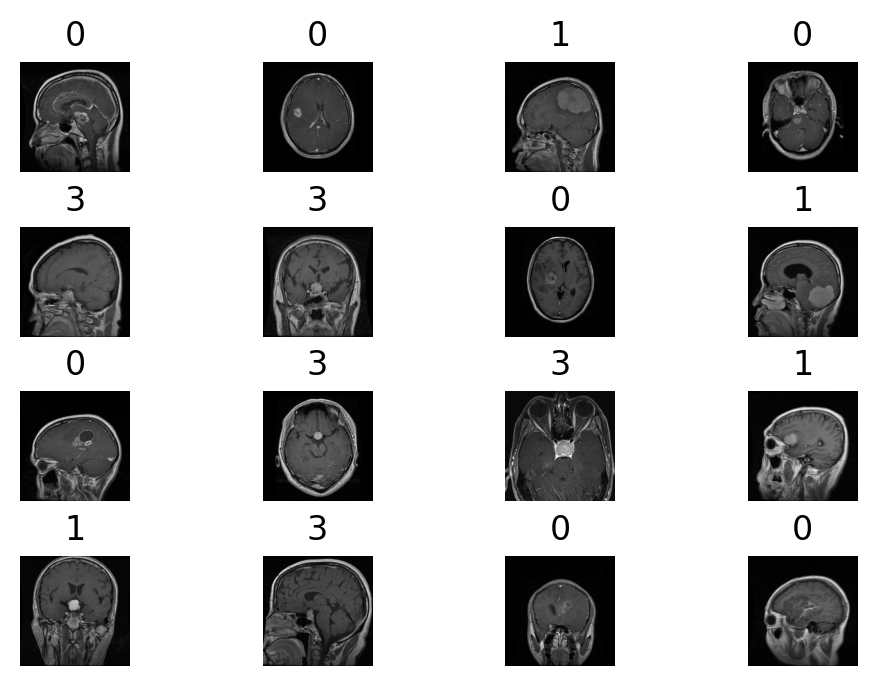

In [ ]:
plt.figure(dpi=200)
i = 1

for images, classes in mri_dataloader:
    plt.subplot(4, 4, i)
    plt.imshow(images[0, 0, :, :], cmap='gray')
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')
    plt.title(classes[0].item())
    i += 1

    if i > 4*4:
      break

plt.show()

In [ ]:
import pandas as pd

dataset_path = output_folder
training_csv_path = os.path.join(dataset_path, "training.csv")
testing_csv_path = os.path.join(dataset_path, "testing.csv")

# Repeat the process from the __init__ function to create pandas dataframe
# containing three components: (image_path, image_class_number, image_class_name)

classes = os.listdir(os.path.join(dataset_path,  "Training"))
print(f"Available classes: {classes}")
classes_dict = {classes[i]: i for i in range(len(classes))}
print(f"Classes dict: {classes_dict}")

training_cases = []
testing_cases = []
for current_class in classes:
    current_training_path = os.path.join(dataset_path, "Training")
    current_training_path = os.path.join(current_training_path, current_class)

    for current_case in os.listdir(current_training_path):
      current_path = os.path.join(current_training_path, current_case)
      training_cases.append((current_path, classes_dict.get(current_class), current_class))

    current_testing_path = os.path.join(dataset_path, "Testing")
    current_testing_path = os.path.join(current_testing_path, current_class)

    for current_case in os.listdir(current_testing_path):
      current_path = os.path.join(current_testing_path, current_case)
      testing_cases.append([current_path, classes_dict.get(current_class), current_class])

training_dataframe = pd.DataFrame(data=training_cases, columns=['image_path', 'image_class_number', 'image_class_name'])
testing_dataframe = pd.DataFrame(data=testing_cases, columns=['image_path', 'image_class_number', 'image_class_name'])

training_dataframe.to_csv(training_csv_path, columns=['image_path', 'image_class_number'])
testing_dataframe.to_csv(testing_csv_path, columns=['image_path', 'image_class_number'])

Available classes: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Classes dict: {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


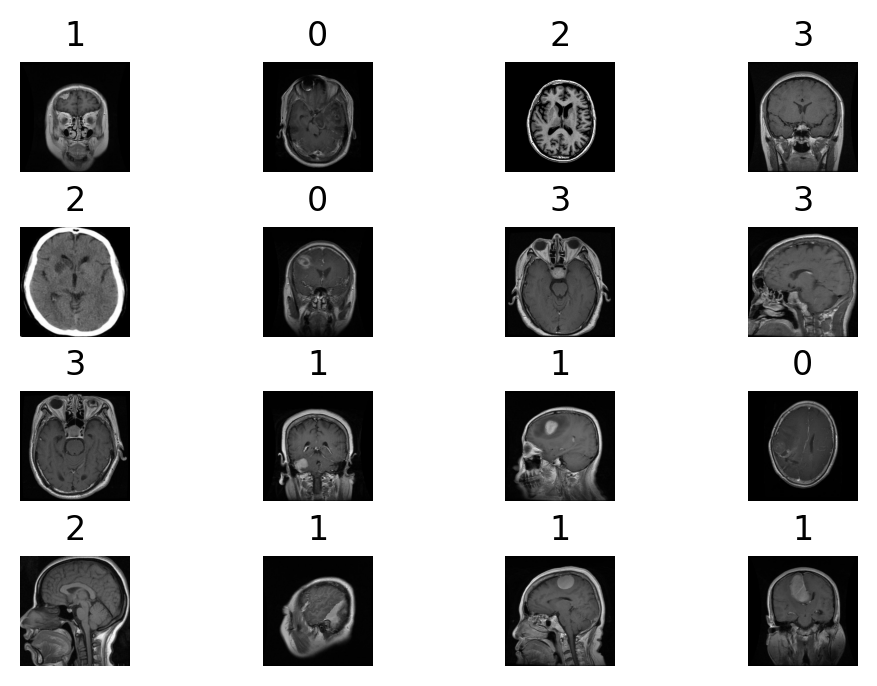

In [ ]:
class BrainDataset(tc.utils.data.Dataset):
    def __init__(self, dataset_path, csv_path, transforms=None, z_norm=False):
        self.dataset_path = dataset_path
        self.csv_path = csv_path
        self.dataframe = pd.read_csv(csv_path)

    def __len__(self):
        return len(self.dataframe)
        
    def __getitem__(self, idx):
        current_image = tv.io.read_image(self.dataframe.iloc[idx]['image_path'])
        current_class = self.dataframe.iloc[idx]['image_class_number']

        # All images should have the same resolution
        # Resample the images to the same resolution (224x224), then convert the images to grayscale (if not already) and normalize to [0-1] values
        current_image = tv.transforms.Resize(size=(224,224), interpolation=tv.transforms.InterpolationMode.BILINEAR)(current_image)
        current_image = tv.transforms.Grayscale()(current_image)
        current_image = current_image.type(tc.float)
        current_image = tv.transforms.Normalize(mean=(0.5), std=(0.5))(current_image)
        
        return current_image, current_class

batch_size = 16
shuffle = True
training_dataset = BrainDataset(os.path.join(dataset_path, "Training"), training_csv_path)
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

plt.figure(dpi=200)
i = 1

for images, classes in training_dataloader:
    plt.subplot(4, 4, i)
    plt.imshow(images[0, 0, :, :], cmap='gray')
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')
    plt.title(classes[0].item())
    i += 1

    if i > 4*4:
      break

In [ ]:
input_file = "/content/gdrive/MyDrive/Instruments_Endoscopy.zip" # Path to the "Brain_MRI.zip"
output_folder = "/content/gdrive/MyDrive/Instruments_Endoscopy" # Path to the folder where you would like to unzip the input ".zip" file

print(f"Input file path: {input_file}")
print(f"Output folder path: {output_folder}")

#!unzip {input_file} -d {output_folder}

Input file path: /content/gdrive/MyDrive/Instruments_Endoscopy.zip
Output folder path: /content/gdrive/MyDrive/Instruments_Endoscopy


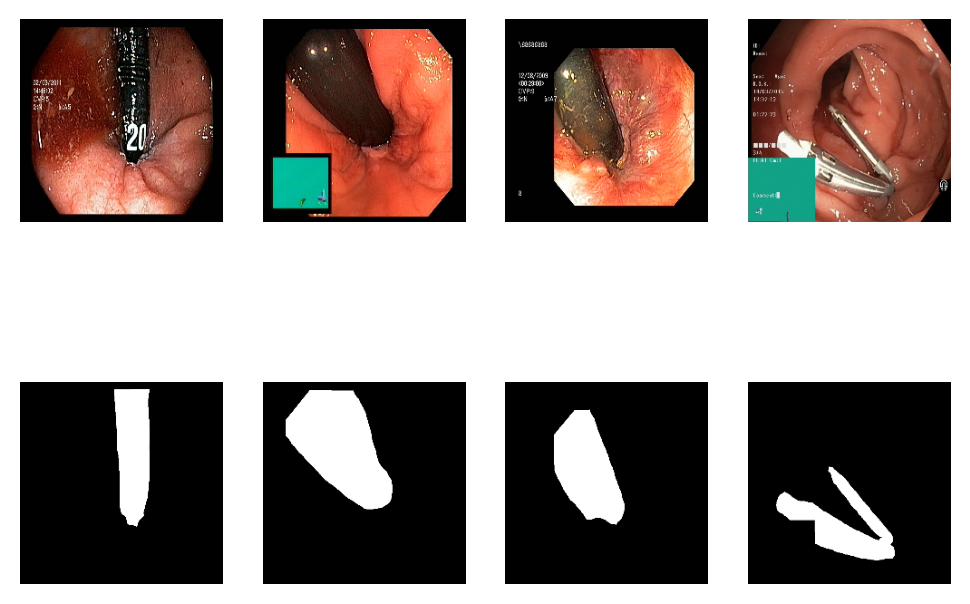

In [ ]:
import pandas as pd
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
import torchvision as tv
import os

dataset_path = output_folder
training_csv_path = os.path.join(dataset_path, "training.csv")
testing_csv_path = os.path.join(dataset_path, "testing.csv")

images_path = '/content/gdrive/MyDrive/Instruments_Endoscopy/kvasir-instrument/images/images'
masks_path = '/content/gdrive/MyDrive/Instruments_Endoscopy/kvasir-instrument/masks/masks'

train_file = open('/content/gdrive/MyDrive/Instruments_Endoscopy/kvasir-instrument/train.txt', 'r')
test_file = open('/content/gdrive/MyDrive/Instruments_Endoscopy/kvasir-instrument/test.txt', 'r')

training_cases = []
testing_cases = []

lines = train_file.readlines()
for line in lines:
  image = line[:-1] + '.jpg'
  mask = line[:-1] + '.png'
  image_path = os.path.join(images_path, image)
  mask_path = os.path.join(masks_path, mask)
  training_cases.append([image_path, mask_path])

lines = test_file.readlines()
for line in lines:
  image = line[:-1] + '.jpg'
  mask = line[:-1] + '.png'
  image_path = os.path.join(images_path, image)
  mask_path = os.path.join(masks_path, mask)
  testing_cases.append([image_path, mask_path])

training_dataframe = pd.DataFrame(data=training_cases, columns=['image_path', 'mask_path'])
testing_dataframe = pd.DataFrame(data=testing_cases, columns=['image_path', 'mask_path'])

training_dataframe.to_csv(training_csv_path, columns=['image_path', 'mask_path'])
testing_dataframe.to_csv(testing_csv_path, columns=['image_path', 'mask_path'])

class EndoscopyDataset(tc.utils.data.Dataset):
    def __init__(self, dataset_path, csv_path, transforms=None, z_norm=False):
        self.dataset_path = dataset_path
        self.csv_path = csv_path
        self.dataframe = pd.read_csv(csv_path)

    def __len__(self):
        return len(self.dataframe)
        
    def __getitem__(self, idx):
        current_image = tv.io.read_image(self.dataframe.iloc[idx]['image_path'])
        current_mask = tv.io.read_image(self.dataframe.iloc[idx]['mask_path'])

        current_image = tv.transforms.Resize(size=(224,224), interpolation=tv.transforms.InterpolationMode.BILINEAR)(current_image)
        current_image = current_image.type(tc.float)

        tmp = current_image.clone()
        tmp = tmp.view(current_image.size(0), -1)
        tmp -= tmp.min(1, keepdim=True)[0]
        tmp /= tmp.max(1, keepdim=True)[0]
        current_image = tmp.view(current_image.size(dim=0), current_image.size(dim=1), current_image.size(dim=2))

        current_mask = tv.transforms.Resize(size=(224,224), interpolation=tv.transforms.InterpolationMode.BILINEAR)(current_mask)
        current_mask = tv.transforms.Grayscale()(current_mask)
        current_mask = current_mask.type(tc.float)
        current_mask = tv.transforms.Normalize(mean=(0.5), std=(0.5))(current_mask)
        
        return current_image, current_mask

batch_size = 4
shuffle = True
training_dataset = EndoscopyDataset(dataset_path, training_csv_path)
training_dataloader = tc.utils.data.DataLoader(training_dataset, batch_size=batch_size, shuffle=shuffle)

plt.figure(dpi=200)
i = 1

for images, masks in training_dataloader:
    plt.subplot(2, 4, i)
    images = images[0,:,:,:]
    images = images.permute(1, 2, 0)  #swap_axis numpy or permute in pytorch
    plt.imshow(images)
    
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')

    plt.subplot(2, 4, i+4)
    plt.imshow(masks[0, 0, :, :], cmap='gray')
    plt.subplots_adjust(hspace=0.5)
    plt.axis('off')
    i += 1

    if i > 4:
      break